<h1 style="color:blue">Data analysis | Netflix</h1>

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

##
<h2 style="color:blue">1. Understanding the data</h2>

In this section, I used pandas to explore my dataset, analyzing its characteristics, dimensions, and statistical properties.

    The section includes:
- summary statistics such as mean, median, mode, standard deviation, and quartiles, to understand the central tendency and distribution of the data for numerical columns;
- conclusions based on these summary statistics;
- summary statistics for categorical columns; and
- conclusions based on these statistics.

In [1]:
# Imported libraries necessary for the whole data journey.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(pd.__version__)
print(np.__version__)
print(plt.matplotlib.__version__)
print(sns.__version__)

2.2.1
1.26.4
3.8.3
0.13.2


In [3]:
# Loaded the dataset into a dataframe.

netflix_df = pd.read_csv("/Users/milenko/My Drive (1307mile@gmail.com)/bootcamp/w3 project/data/netflix_titles.csv")

# Identified the dimensions of the dataset. It has 8807 rows and 12 columns.

netflix_df.shape

(8807, 12)

In [4]:
# Inspected the dataframe for cleanliness, and identified the content of the columns.
# The data appears to be clean.

netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<h2 style="color:blue">1.1. Data description</h2>

- "**show_id**" : a sequence of numbers in ascending order, with prefix "s".
- Prefix "s" may mean that the show ID starts with an "s", and a movie ID starts with "m"?

- "**type**" : content-categories, "Movie" and "TV Show".

- "**title**" : name of the content.

- "**director**" : full name of a person who directed the content.

- "**cast**" : full names of some of the stars of the content.

- "**country**" : country or countries where the content was produced.

- "**date_added**" : the date the content was published on Netflix.
Original format of the values in the column are "Month DD, YYYY".

- "**release_year**" : content release year.

- "**rating**" : content rating for the US market; provides information about the appropriate audience of the content.

- "**duration**" : timelength of the content, denoted in minute formats or number of seasons.

- "**listed_in**" : genre/s of the content.

- "**description**" : content-plot.

In [5]:
# Checked the data types of each column. All the types seem appropriate for the nature of the variable.
# Perhaps the "date_added" column will undergo some changes which will affect its dtype in the next chapter.

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Checked for the number of unique values for each column to determine which columns appear to be categorical.

netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [7]:
# Divided the columns to categorical and numerical data,
# based on data preview, column-names and content, data type, and number of unique values per column.

numerical_data = ["release_year"]
categorical_data = ["show_id", "type", "title", "director", "cast", "country", "date_added", "rating", "duration", "listed_in", "description"]

<h2 style="color:blue">1.2. Numerical data</h2>

Here is statistical summary of the numerical data, which in this case is only 1 column, "release_year".<br>
Of the 8807 titles available on Netflix, average release year is 2014, give or take 9 years.<br>
The oldest title in the library is from 1925, and the most recent one is from 2021, the year of the data collection.

In [8]:
netflix_df[numerical_data].describe().round(0).astype(int)

,release_year
count,8807
mean,2014
std,9
min,1925
25%,2013
50%,2017
75%,2019
max,2021


In [9]:
# Observed the count of unique values. As the statistical summary showed, 75% of the content was released between 2013 and 2019.

netflix_df["release_year"].value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [10]:
# Observed unique values for "release_year". They look clean and in consistent format YYYY, ready for analysis.

unique_release_years = np.sort(netflix_df["release_year"].unique())
print(unique_release_years)

[1925 1942 1943 1944 1945 1946 1947 1954 1955 1956 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021]


<h2 style="color:blue">1.3. Categorical data</h2>

Statistical summary of the categorical data shows that:
- **count-wise**, 8 columns are well-populated, almost 100%, while 4 columns are missing 10-20% values.
- **unique** count in some columns seems unexpectedly high, such as 748 countries, or 514 genres.
  
- **top** values are as follows:
- Movie is the dominant content **type**, with 6131 entries against 2676 TV Shows.
- Rajiv Chilaka and David Attenborough show as the top single entries in terms of **director**s and **cast**.
- United States is the **country** where relative majority of the content was produced.
- January 1, 2020 was the peak day when 109 movies or tv shows were **added**.
- 1/3 of the content is targetting and restricted to a mature audience, as per its **rating**.
- 20% of the content had **duration** of 1 Season.
- Most frequently the content was **listed_in** or as "Dramas, International Movies".

In [11]:
netflix_df[categorical_data].describe()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [12]:
# When observing columns such as "country", unique values count feels odd,
# We don't have 748 countries in the world, right?
# Let's check the value counts to see what is causing this.

for column in categorical_data:
    value_counts = netflix_df[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for show_id:
show_id
s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: count, Length: 8807, dtype: int64

Value counts for type:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Value counts for title:
title
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: count, Length: 8807, dtype: int64

Value counts for director:
director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav               

The high count of unique values is caused by multiple entries per field. Let's explain it on the example of countries:
- content produced in the United States generates one unique value for the column "country";
- co-production between the US and, say, France, generates its own unique value "United States, France" for the column "country".
  
So, while half of the content is produced by only 4 countries, it's the co-productions, co-directed content, and other joint efforts that possibly inflate some columns, and this will need to be parsed.<br><br>
While looking for the cause of inflated number of unique values, I also spotted leading whitespace in some values.<br>
Examples: ', France, Algeria' in "country", and ' April 15, 2018' in "date_added".<br>
So, it's time to start cleaning this data.

In [13]:
for column in categorical_data:
    unique = np.sort(netflix_df[column].astype(str).unique())
    print(f"Unique values for {column}:\n{unique}\n")

Unique values for show_id:
['s1' 's10' 's100' ... 's997' 's998' 's999']

Unique values for type:
['Movie' 'TV Show']

Unique values for title:
['#Alive' '#AnneFrank - Parallel Stories' '#FriendButMarried' ... '마녀사냥'
 '반드시 잡는다' '최강전사 미니특공대 : 영웅의 탄생']

Unique values for director:
['A. L. Vijay' 'A. Raajdheep' 'A. Salaam' ... 'Óskar Thór Axelsson'
 'Ömer Faruk Sorak' 'Şenol Sönmez']

Unique values for cast:
["'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Odenike Odetola, Funmi Eko, Keppy Ekpenyong"
 '4Minute, B1A4, BtoB, ELSIE, EXID, EXO, Got7, INFINITE, KARA, Shinee, Sistar, VIXX, Nine Muses, BTS, Secret, Topp Dogg'
 '50 Cent, Ryan Phillippe, Bruce Willis, Rory Markham, Jenna Dewan, Brett Granstaff, Randy Couture, Susie Abromeit, Ron Turner, James Remar'
 ...
 'Şahin Irmak, İrem Sak, Gonca Vuslateri, Emre Karayel, Duygu Yetiş, Onur Buldu, Salih Kalyon, Bilge Şen, Nilgün Belgün, Hakan Akın'
 'Şükrü Özyıldız, Aslı Enver, Şenay Gürler, Başak Parlak, Mahir Günşiray, Hakan Boyav, Hakan Gerçek, 

##
<h2 style="color:blue">2. Data cleaning and formatting</h2>

What happens in this section:
- cleaning data:
  - dealing with null values,
  - duplicates,
  - redundant or useless info, and
- formatting.

<h2 style="color:blue">2.1. Null values</h2>

In [14]:
# Checked for null values. They are concentrated in 3 columns: "director", "cast", and "country".

print(netflix_df.shape)
netflix_df.isna().sum()

(8807, 12)


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The null values are concentrated in 3 very important columns, though it's hard to say which column in this dataset is not important.<br>
I've experimented dropping the rows with null values, with threshholds from 9 to 12, and the results were:
- 9 = no change in null values, no rows dropped;
- 10 = minimal change in null values, 100 rows dropped;
- 11 = slightly bigger change in null values, but 800 rows dropped; the win-lose ratio is not worth it;
- 12 = no null values left, 40% rows dropped.

I'd rather not drop any values, but instead fill them up according to the datatype:
- "unknown" string value for the object data type columns, and
- "0" integer value for the columns "date_added" and "release_year".

In [15]:
# Filled null values. No more null values left.

netflix_df.fillna(value={"date_added": "0", "release_year": "0"}, inplace=True)
netflix_df = netflix_df.fillna("unknown")
print(netflix_df.shape)
netflix_df.isna().sum()

(8807, 12)


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<h2 style="color:blue">2.2. Duplicates</h2>

In [16]:
#Checked for duplicated rows. There are none.

netflix_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

While understanding the data, I've noticed that the 1st column "show_id" seems to display a sequence of numbers in ascending order, with prefix "s".<br>
My first guess would be that the prefix "s" distinguished a "TV Show" content from "Movie".<br>
However, the head and tail of the dataframe showed no other prefix, and there were Movies with an id value starting with "s".<br>
I'll check if there are any other prefixes in this column, else will delete it for redundancy with the default index.

In [17]:
# There is no other prefix. Removed the column "show_id".

any_other_letter = netflix_df.show_id[netflix_df.show_id.str[0].str.lower() != 's']
print(any_other_letter)
netflix_df = netflix_df.drop("show_id", axis=1)

Series([], Name: show_id, dtype: object)


Used many data cleaning techniques including handling null values, duplicates, dropping unnecessary columns, manipulating strings, and formatting data
• Addressed missing data properly, fully justified the imputation strategy

<h2 style="color:blue">2.3. Formatting</h2>

In [18]:
# Renamed some columns to add clarity and be more descriptive.

netflix_df.rename(columns= 
            {'type': 'content_type', 'date_added': 'streaming_premiere', 'listed_in': 'genre'}, inplace=True)

In [19]:
# Cleaned the data from leading and trailing whitespace.

netflix_df = netflix_df.apply(lambda x: x.map(lambda y: y.strip() if isinstance(y, str) else y))

In [20]:
# Changed "streaming_premiere" column to datatype more inappropriate for calculations.

netflix_df.streaming_premiere = pd.to_datetime(netflix_df.streaming_premiere, errors='coerce')
netflix_df.dtypes

content_type                  object
title                         object
director                      object
cast                          object
country                       object
streaming_premiere    datetime64[ns]
release_year                   int64
rating                        object
duration                      object
genre                         object
description                   object
dtype: object

##
<h2 style="color:blue">3. Data structuring</h2>

The columns "director", "cast", "country", and "genre" include data that has one-to-many relationships.<br>
These grouped entries inflate count of unique values per column, so we end up observing bizarre counts such as 748 countries or 514 genres.<br><br>
To improve analysis, at first I attempt to split the multiple entries into their separate columns.<br>
This doesn't prove an ideal solution, because the newly generated columns are mostly filled with null values.<br>
On the example of "director", new columns would bring in dozens of thousands of null values, because some films for some reasons have so many co-directors.

If I were to fill in those newly generated null values with another shower of "unknown" string, i'd just keep dilluting my statistical power.<br>
My final decision is to keep a single column for "director" (and "cast", "country", "genre"), and drop from it any values that go beyond a ",".

In [21]:
netflix_df_original = netflix_df.copy()
columns_to_split = ['director', 'cast', 'country', 'genre']

for column in columns_to_split:
    split_values = netflix_df[column].astype(str).str.split(', ', expand=True)
    netflix_df[column] = split_values[0]

In [22]:
# The before-after comparison shows great improvement in deflated unique values in all 4 columns.

column_names = netflix_df_original.columns
unique_counts_before = netflix_df_original.apply(lambda col: col.nunique())
unique_counts_after = netflix_df.apply(lambda col: col.nunique())

df_counts = pd.DataFrame({
    "column_name": column_names,
    "unique_counts_before": unique_counts_before,
    "unique_counts_after": unique_counts_after}).reset_index(drop=True)

df_counts

,column_name,unique_counts_before,unique_counts_after
0,content_type,2,2
1,title,8806,8806
2,director,4529,4406
3,cast,7693,5401
4,country,749,90
5,streaming_premiere,1714,1714
6,release_year,74,74
7,rating,18,18
8,duration,221,221
9,genre,514,36


##
<h2 style="color:blue">4. Data combining</h2>

In this section, I'm pivoting content_type with other columns, to find the top values.<br>
I've defined a function because I wish to try pivotting all the columns against each others, time-permitting.

In [23]:
def top_5_pivot(netflix_df, values, index, columns):
    pivot_table = pd.pivot_table(netflix_df,
                                  values=values,
                                  index=index,
                                  columns=columns,
                                  aggfunc='count',
                                  fill_value=0)

    pivot_table['total_count'] = pivot_table.sum(axis=1)

    pivot_table = pivot_table.sort_values(by='total_count', ascending=False)

    display(pivot_table.head(5))

In [24]:
columns_to_pivot = ['director', 'cast', 'country', 'streaming_premiere', 'release_year', 'rating', 'duration', 'genre']

for col in columns_to_pivot:
    print(f"Top 5 content x {col}:")
    print(top_5_pivot(netflix_df, 'title', col, 'content_type'))
    print()

Top 5 content x director:


content_type,Movie,TV Show,total_count
director,,,
unknown,188,2446,2634
Rajiv Chilaka,22,0,22
Raúl Campos,18,0,18
Suhas Kadav,16,0,16
Marcus Raboy,15,1,16


None

Top 5 content x cast:


content_type,Movie,TV Show,total_count
cast,,,
unknown,475,350,825
Shah Rukh Khan,26,0,26
Akshay Kumar,23,0,23
Adam Sandler,20,0,20
Amitabh Bachchan,20,0,20


None

Top 5 content x country:


content_type,Movie,TV Show,total_count
country,,,
United States,2363,847,3210
India,927,81,1008
unknown,440,391,831
United Kingdom,380,246,626
Canada,187,84,271


None

Top 5 content x streaming_premiere:


content_type,Movie,TV Show,total_count
streaming_premiere,,,
2020-01-01,97,13,110
2019-11-01,75,16,91
2018-03-01,72,3,75
2019-12-31,67,7,74
2018-10-01,64,7,71


None

Top 5 content x release_year:


content_type,Movie,TV Show,total_count
release_year,,,
2018,767,380,1147
2017,767,265,1032
2019,633,397,1030
2020,517,436,953
2016,658,244,902


None

Top 5 content x rating:


content_type,Movie,TV Show,total_count
rating,,,
TV-MA,2062,1145,3207
TV-14,1427,733,2160
TV-PG,540,323,863
R,797,2,799
PG-13,490,0,490


None

Top 5 content x duration:


content_type,Movie,TV Show,total_count
duration,,,
1 Season,0,1793,1793
2 Seasons,0,425,425
3 Seasons,0,199,199
90 min,152,0,152
94 min,146,0,146


None

Top 5 content x genre:


content_type,Movie,TV Show,total_count
genre,,,
Dramas,1600,0,1600
Comedies,1210,0,1210
Action & Adventure,859,0,859
Documentaries,829,0,829
International TV Shows,0,774,774


None



##
<h2 style="color:blue">5. Visualisation</h2>

Now I'd like to focus on the dominant content type, and pivot it with other columns to find top performers.

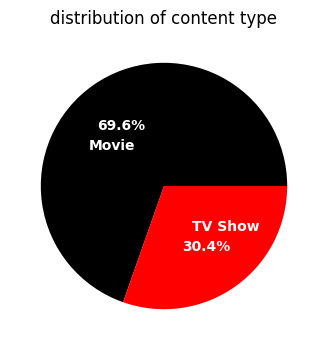

In [52]:
# Movie is the dominant type

content_type_counts = netflix_df.content_type.value_counts()
colors = ['black', 'red']
textprops = {'color': 'white', 'weight': 'bold'}

plt.figure(figsize=(4, 4))
plt.title("distribution of content type")
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', labeldistance=0.4, 
        colors=colors, textprops=textprops)
plt.show()

Top 5 Movie directors:


,title
director,
unknown,188
Rajiv Chilaka,22
Raúl Campos,18
Suhas Kadav,16
Jay Karas,15


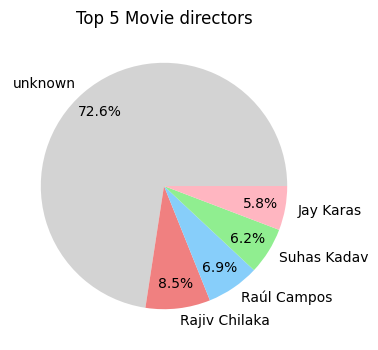

Top 5 Movie casts:


,title
cast,
unknown,475
Shah Rukh Khan,26
Akshay Kumar,23
Adam Sandler,20
Amitabh Bachchan,20


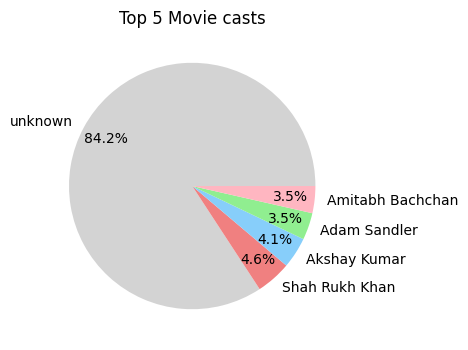

Top 5 Movie countrys:


,title
country,
United States,2363
India,927
unknown,440
United Kingdom,380
Canada,187


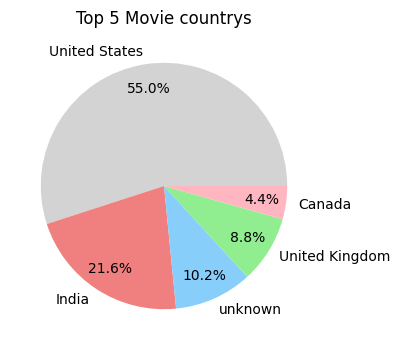

Top 5 Movie release_years:


,title
release_year,
2017,767
2018,767
2016,658
2019,633
2020,517


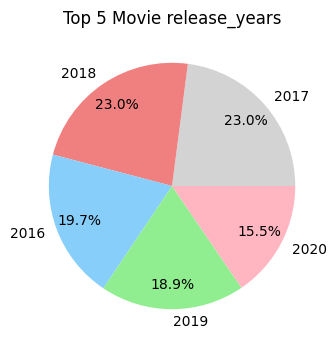

Top 5 Movie ratings:


,title
rating,
TV-MA,2062
TV-14,1427
R,797
TV-PG,540
PG-13,490


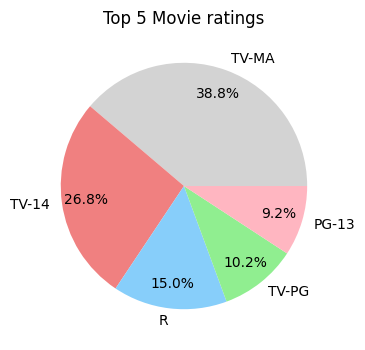

Top 5 Movie genres:


,title
genre,
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
Children & Family Movies,605


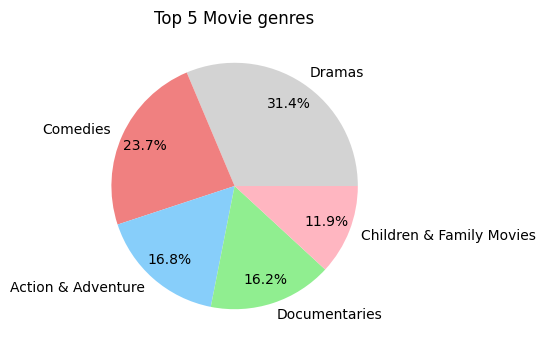

In [36]:
def top_5_pie(netflix_df, content_type, values_column, index_column, colors):

    filtered_data = netflix_df[netflix_df['content_type'] == content_type]
    pivot_table = pd.pivot_table(filtered_data, values=values_column, index=index_column, aggfunc='count').nlargest(5, values_column)

    print(f"Top 5 {content_type} {index_column}s:")
    display(pivot_table)

    plt.figure(figsize=(4, 4))
    plt.title(f"Top 5 {content_type} {index_column}s")
    plt.pie(pivot_table[values_column], labels=pivot_table.index, autopct='%1.1f%%', pctdistance=0.8, colors=colors)
    plt.show()


columns_to_pivot = ['director', 'cast', 'country', 'release_year', 'rating', 'genre']
colors = ['lightgrey', 'lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']

for column in columns_to_pivot:
    top_5_pie(netflix_df, 'Movie', 'title', column, colors)


Top 5 Movie directors:


,title
director,
unknown,188
Rajiv Chilaka,22
Raúl Campos,18
Suhas Kadav,16
Jay Karas,15


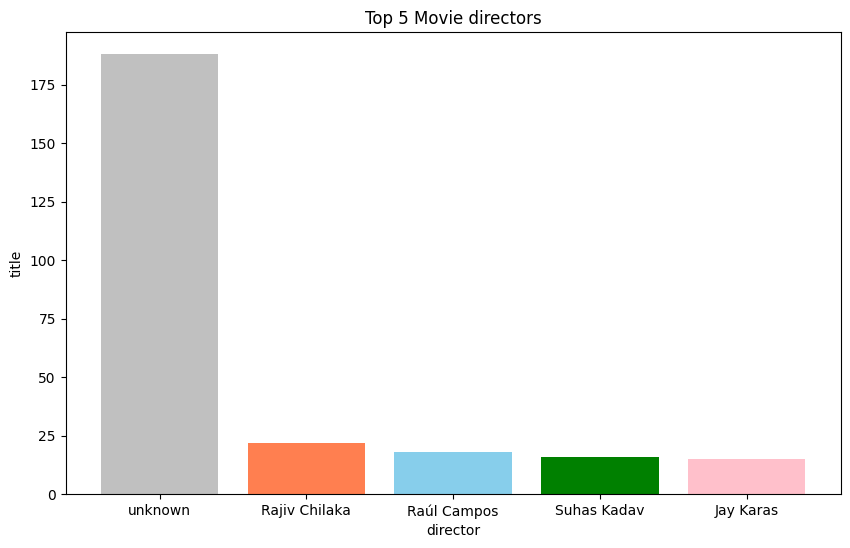

Top 5 Movie casts:


,title
cast,
unknown,475
Shah Rukh Khan,26
Akshay Kumar,23
Adam Sandler,20
Amitabh Bachchan,20


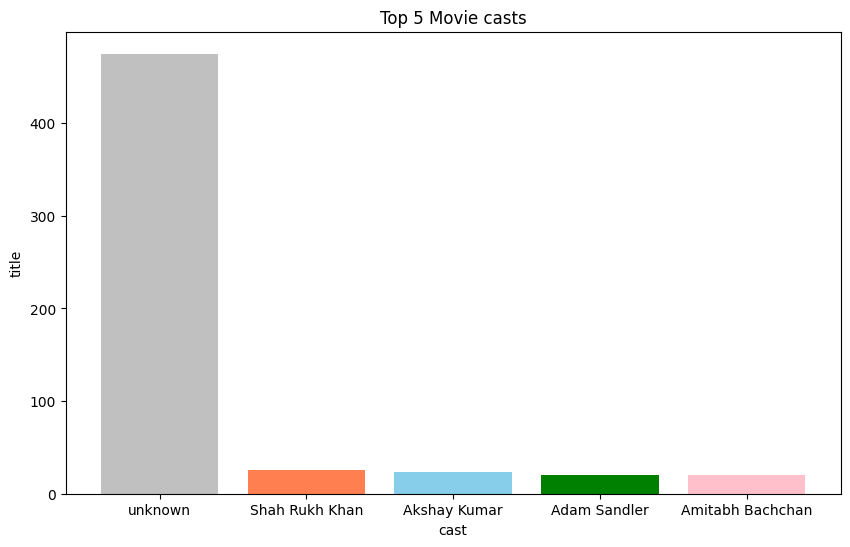

Top 5 Movie countrys:


,title
country,
United States,2363
India,927
unknown,440
United Kingdom,380
Canada,187


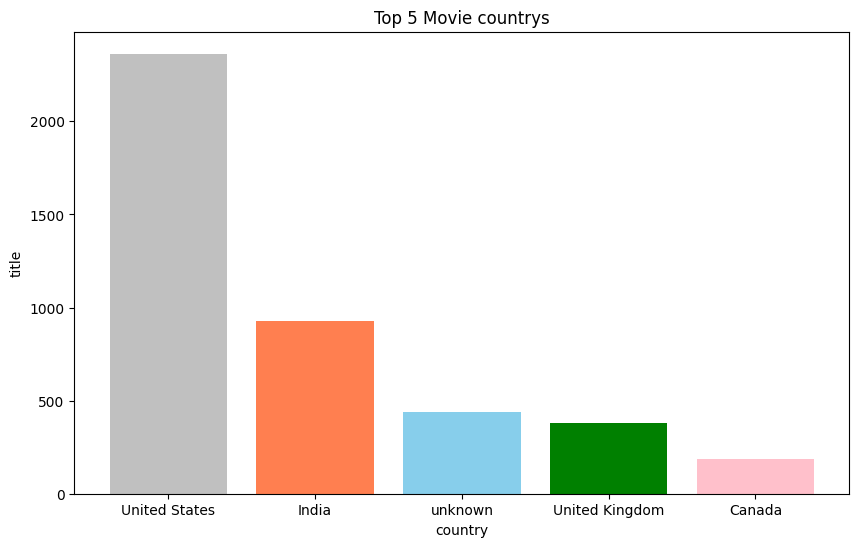

Top 5 Movie release_years:


,title
release_year,
2017,767
2018,767
2016,658
2019,633
2020,517


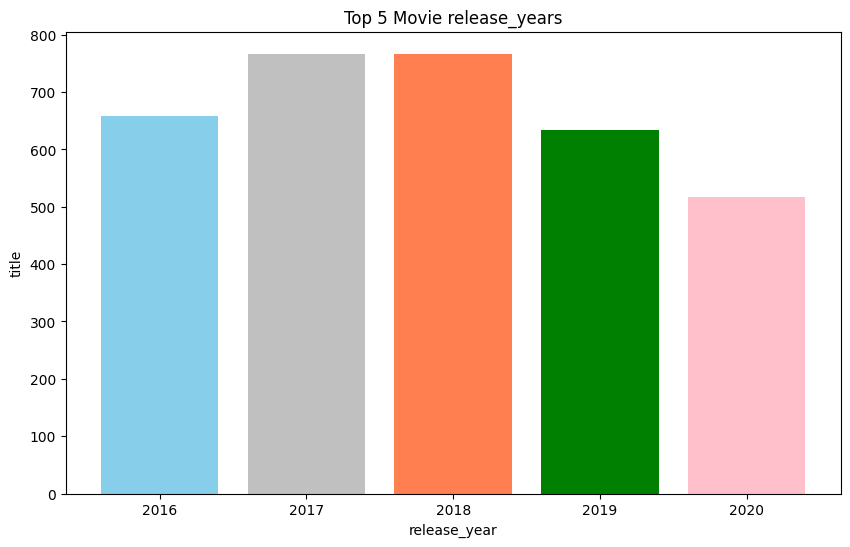

Top 5 Movie ratings:


,title
rating,
TV-MA,2062
TV-14,1427
R,797
TV-PG,540
PG-13,490


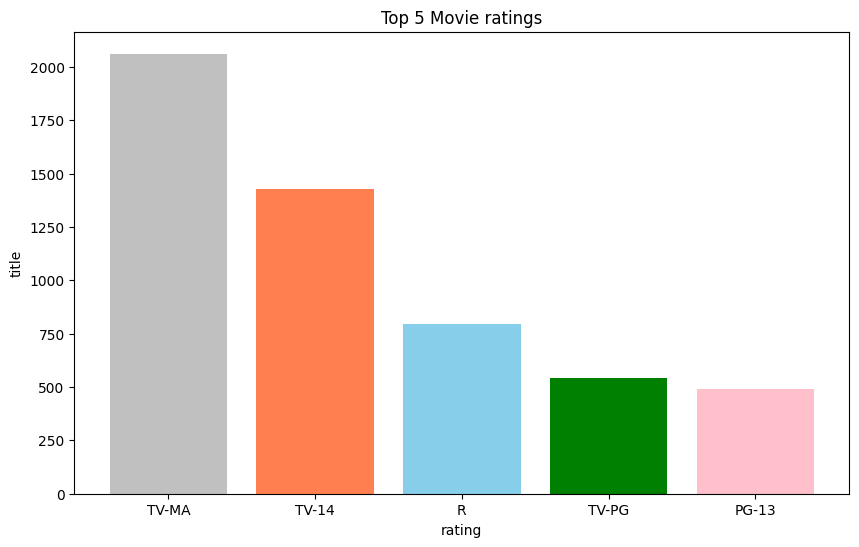

Top 5 Movie genres:


,title
genre,
Dramas,1600
Comedies,1210
Action & Adventure,859
Documentaries,829
Children & Family Movies,605


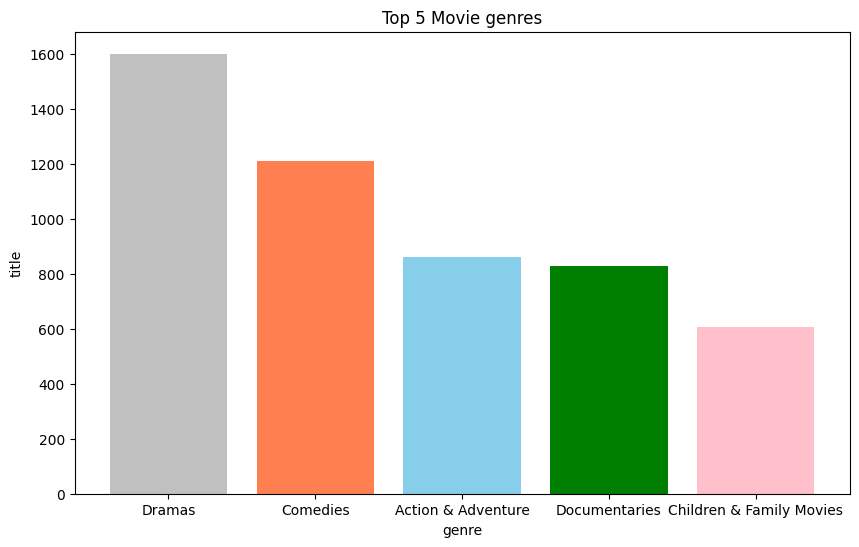

In [56]:
def top_5_bar(netflix_df, content_type, values_column, index_column, colors):

    filtered_data = netflix_df[netflix_df['content_type'] == content_type]
    pivot_table = pd.pivot_table(filtered_data, values=values_column, index=index_column, aggfunc='count').nlargest(5, values_column)

    print(f"Top 5 {content_type} {index_column}s:")
    display(pivot_table)

    plt.figure(figsize=(10, 6))
    plt.title(f"Top 5 {content_type} {index_column}s")
    plt.bar(pivot_table.index, pivot_table[values_column], color=colors)
    plt.xlabel(index_column)
    plt.ylabel(values_column)
    plt.show()

columns_to_pivot = ['director', 'cast', 'country', 'release_year', 'rating', 'genre']
colors = ['silver', 'coral', 'skyblue', 'green', 'pink']

for column in columns_to_pivot:
    top_5_bar(netflix_df, 'Movie', 'title', column, colors)
